In [6]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from sklearn import datasets, svm

# Data Preprocessing 
dataset = pd.read_csv("../Datasets/heart-disease.csv")

In [7]:
from sklearn.preprocessing import StandardScaler
X = dataset.drop("target",axis=1 )
y = dataset["target"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size = 0.2, random_state = 25)
X_validation, X_test,y_validation, y_test = train_test_split(X_test,y_test, test_size = 0.5,random_state = 25)
len(X_train)

242

In [9]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [
    ('scaler', StandardScaler()),
    ('model', Lasso())
]

lasso_pipe = Pipeline(steps)

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [ {'model__alpha': np.logspace(-10,0.0000001,200) } ]

from sklearn.metrics import make_scorer
scoring_func = make_scorer(mean_squared_error)
grid_search = GridSearchCV(estimator = lasso_pipe, 
                           param_grid = parameters,
                           scoring = scoring_func,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_validation, y_validation) 

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprec...
       1.76291449e-01, 1.979167

In [10]:
alpha  = grid_search.best_params_['model__alpha']

In [11]:
clf = Lasso(alpha = alpha)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [12]:
pred

array([ 0.03794719,  0.34262662,  0.79101468,  0.44233713, -0.20458963,
        0.54010234, -0.28062464,  0.96847915,  0.75159897,  0.06125082,
        0.65605933,  0.13196886,  0.78727215,  0.42442296,  0.08872677,
        0.32164944,  0.63875978, -0.13215349,  0.84504069,  0.61426866,
        0.40856879,  0.61602621,  0.76172217,  0.81157987,  0.58427363,
        0.6473586 ,  0.77663317,  1.02312106,  0.6526425 ,  0.9889008 ,
        0.83426159])

In [13]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [14]:
pred = abs(pred.round())
y_test = y_test.astype('int')
pred

array([0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:

total = 0
for i in range(len(pred)):
    total+= (abs(pred[i]-y_test[i]))**2

In [16]:
print(f"the mse is {total/(len(pred))}")

the mse is 0.3225806451612903


In [17]:
clf.coef_

array([-0.00844114, -0.06124442,  0.1494913 , -0.0133557 , -0.00970659,
        0.00329989,  0.01240818,  0.05741255, -0.05606033, -0.06605092,
        0.04225001, -0.1192411 , -0.10532938])

In [18]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [19]:
len(X.columns)
h = np.logspace(-10,0.0000001,2000)

In [20]:
z = []
for i in h:
    clf = Lasso(alpha = i, max_iter = 1000000)
    clf.fit(X_train, y_train)
    z.append(clf.coef_)
    

In [21]:
z

[array([-0.00844114, -0.06124442,  0.1494913 , -0.0133557 , -0.00970659,
         0.00329989,  0.01240818,  0.05741255, -0.05606033, -0.06605092,
         0.04225001, -0.1192411 , -0.10532938]),
 array([-0.00844114, -0.06124442,  0.1494913 , -0.0133557 , -0.00970659,
         0.00329989,  0.01240818,  0.05741255, -0.05606033, -0.06605092,
         0.04225001, -0.1192411 , -0.10532938]),
 array([-0.00844114, -0.06124442,  0.1494913 , -0.0133557 , -0.00970659,
         0.00329989,  0.01240818,  0.05741255, -0.05606033, -0.06605092,
         0.04225001, -0.1192411 , -0.10532938]),
 array([-0.00844114, -0.06124442,  0.1494913 , -0.0133557 , -0.00970659,
         0.00329989,  0.01240818,  0.05741255, -0.05606033, -0.06605092,
         0.04225001, -0.1192411 , -0.10532938]),
 array([-0.00844114, -0.06124442,  0.1494913 , -0.0133557 , -0.00970659,
         0.00329989,  0.01240818,  0.05741255, -0.05606033, -0.06605092,
         0.04225001, -0.1192411 , -0.10532938]),
 array([-0.00844114, -0.0

In [22]:
g = []
for i in np.linspace(0,1,5):
    for j in np.linspace(0,1,5):
        for k in np.linspace(0,1,5):
            for b in np.linspace(0,1,5):
                g.append([i,j,k,b])
        

In [23]:
len(g)

625

In [24]:
from random import randint
colors = []

for i in range(29):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

Text(0.5, 1.0, 'Lasso Coefficient vs. Log(alpha)')

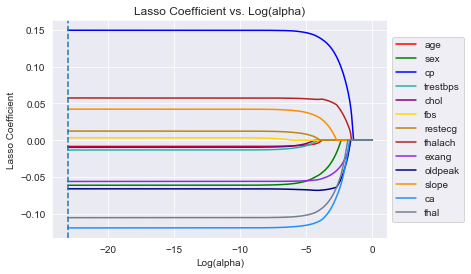

In [27]:
import plotly.express as px
fig,ax = plt.subplots(1,1)
ax.set_prop_cycle(color=['red', 'green', 'blue','lightseagreen','purple','gold','darkgoldenrod','firebrick','blueviolet','navy','darkorange','dodgerblue','slategrey'])
ax.plot(np.log(h),z)


ax.legend(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],loc='center left', bbox_to_anchor=(1, 0.5))#bbox_to_anchor
plt.xlabel('Log(alpha)')
plt.ylabel('Lasso Coefficient')
plt.title('Lasso Coefficient vs. Log(alpha)')

Text(0.5, 1.0, 'Lasso Coefficient vs. Log(alpha) (heightened view)')

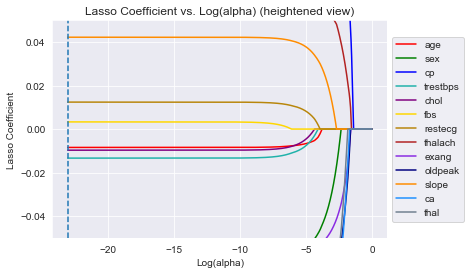

In [28]:
fig,ax = plt.subplots(1,1)
ax.set_prop_cycle(color=['red', 'green', 'blue','lightseagreen','purple','gold','darkgoldenrod','firebrick','blueviolet','navy','darkorange','dodgerblue','slategrey'])
ax.plot(np.log(h),z)

plt.axvline(x = np.log(alpha), linestyle = "--")
ax.legend(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],loc='center left', bbox_to_anchor=(1, 0.5))#bbox_to_anchor
plt.xlabel('Log(alpha)')
plt.ylabel('Lasso Coefficient')
plt.ylim((-0.05,0.05))
plt.title('Lasso Coefficient vs. Log(alpha) (heightened view)')

print(f"The cp is the best indicator because the coefficient never goes to zero and disappears, even at the end")


In [25]:
from sklearn.metrics import confusion_matrix
dataset.corr(method="spearman")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.099131,-0.087494,0.285617,0.195786,0.113978,-0.132769,-0.398052,0.089679,0.268291,-0.184048,0.340955,0.087254,-0.238400
sex,-0.099131,1.000000,-0.062041,-0.052941,-0.151342,0.045032,-0.048389,-0.039868,0.141664,0.100715,-0.025010,0.119368,0.250821,-0.280937
cp,-0.087494,-0.062041,1.000000,0.035413,-0.091721,0.089775,0.065640,0.324013,-0.418256,-0.161449,0.159478,-0.216006,-0.207840,0.460860
trestbps,0.285617,-0.052941,0.035413,1.000000,0.126562,0.151984,-0.125841,-0.040407,0.052918,0.154267,-0.086570,0.090140,0.059673,-0.121593
chol,0.195786,-0.151342,-0.091721,0.126562,1.000000,0.018463,-0.161933,-0.046766,0.091514,0.045260,-0.012551,0.111981,0.083628,-0.120888
fbs,0.113978,0.045032,0.089775,0.151984,0.018463,1.000000,-0.081508,-0.014273,0.025665,0.028363,-0.045786,0.134513,-0.006737,-0.028046
restecg,-0.132769,-0.048389,0.065640,-0.125841,-0.161933,-0.081508,1.000000,0.087863,-0.077399,-0.077372,0.113661,-0.097862,-0.010982,0.148612
thalach,-0.398052,-0.039868,0.324013,-0.040407,-0.046766,-0.014273,0.087863,1.000000,-0.400860,-0.433241,0.436968,-0.257347,-0.160581,0.428370
exang,0.089679,0.141664,-0.418256,0.052918,0.091514,0.025665,-0.077399,-0.400860,1.000000,0.297173,-0.274475,0.162025,0.247113,-0.436757
oldpeak,0.268291,0.100715,-0.161449,0.154267,0.045260,0.028363,-0.077372,-0.433241,0.297173,1.000000,-0.594847,0.224895,0.255026,-0.421487


In [27]:
print("This makes sense because the cp has the highest correlation with target (spearman correlation used because many columns are under an ordinal scale)")

This makes sense because the cp has the highest correlation with target (spearman correlation used because many columns are under an ordinal scale)
